# **Supermart Grocery Sales Data Analysis**
### **By Arsh Vohra**

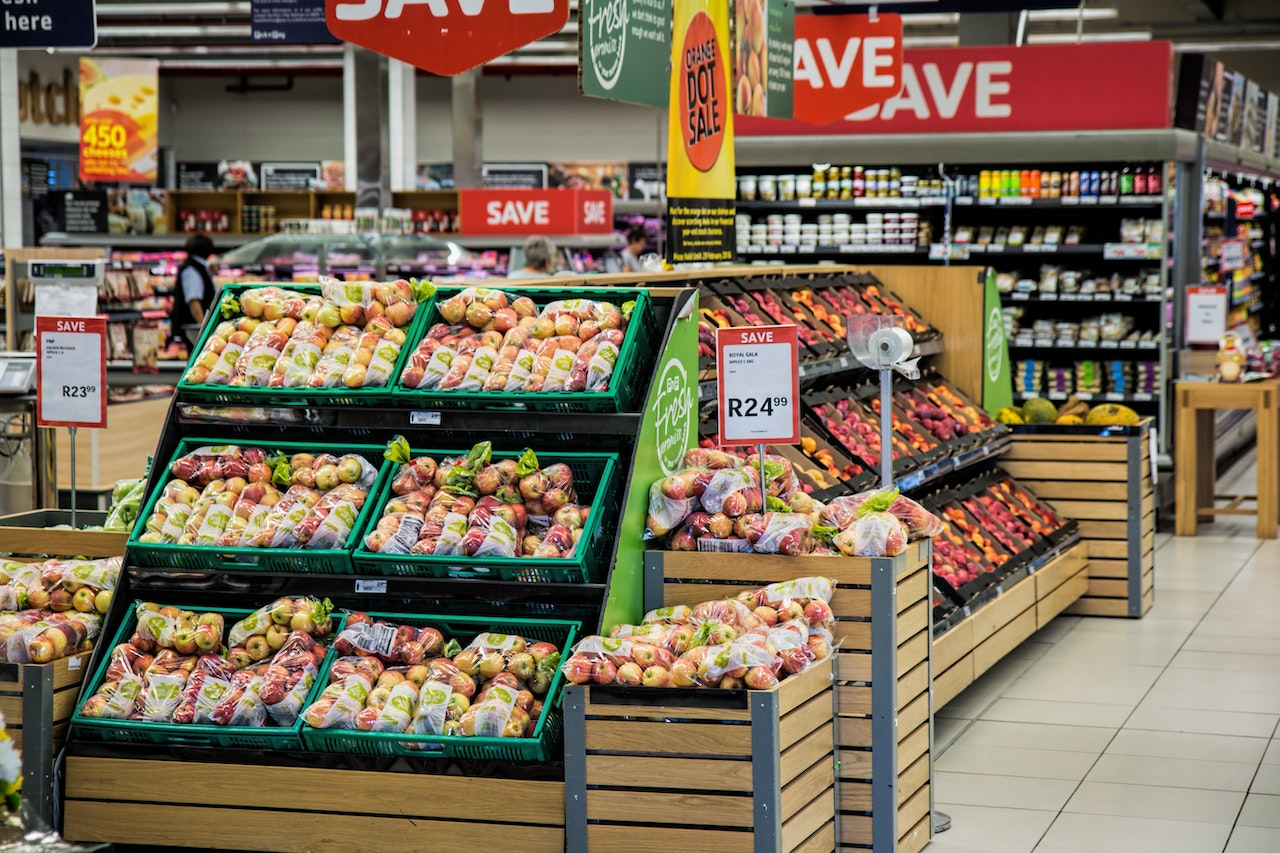



#We will analyse the "Supermart Grocery Sales" dataset in this EDA to obtain insights into sales trends and customer behaviour in a grocery shop. This initiative aims to explore the data and unearth secret trends and patterns that can help us make data-driven choices..

# **Downloading the Dataset**

## This is statistics from a supermarket's food purchases based on orders made by consumers via a grocery app.

In [106]:
!pip install jovian opendatasets --upgrade --quiet

In [107]:
dataset_url = 'https://www.kaggle.com/datasets/mohamedharris/supermart-grocery-sales-retail-analytics-dataset' 

In [108]:
import opendatasets as od
od.download(dataset_url)

Skipping, found downloaded files in "./supermart-grocery-sales-retail-analytics-dataset" (use force=True to force download)


In [109]:
data_dir = './supermart-grocery-sales-retail-analytics-dataset'

In [110]:
import os
os.listdir(data_dir)

['Supermart Grocery Sales - Retail Analytics Dataset.csv']

In [111]:
project_name = "supermart-grocery-sales-data-anaysis"

In [112]:
!pip install jovian --upgrade -q

In [113]:
import jovian

In [ ]:
jovian.commit(project=project_name)

# **Data Preparation and Cleaning**



### Here We will first use Pandas to import the dataset into a data frame, and then we will investigate the amount of rows and columns, value ranges, and so on. Handle absent, incorrect, and invalid data, as well as any extra processes such as parsing dates, adding new fields, combining numerous datasets, and so on.



In [115]:
import pandas as pd 
import numpy as np

In [116]:
df = pd.read_csv("./supermart-grocery-sales-retail-analytics-dataset/Supermart Grocery Sales - Retail Analytics Dataset.csv")

In [117]:
df.head()

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
0,OD1,Harish,Oil & Masala,Masalas,Vellore,11-08-2017,North,1254,0.12,401.28,Tamil Nadu
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749,0.18,149.80,Tamil Nadu
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,06-12-2017,West,2360,0.21,165.20,Tamil Nadu
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10-11-2016,South,896,0.25,89.60,Tamil Nadu
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,10-11-2016,South,2355,0.26,918.45,Tamil Nadu


In [118]:
df.shape

(9994, 11)

In [119]:
df.isna().sum()

Order ID         0
Customer Name    0
Category         0
Sub Category     0
City             0
Order Date       0
Region           0
Sales            0
Discount         0
Profit           0
State            0
dtype: int64

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9994 non-null   object 
 1   Customer Name  9994 non-null   object 
 2   Category       9994 non-null   object 
 3   Sub Category   9994 non-null   object 
 4   City           9994 non-null   object 
 5   Order Date     9994 non-null   object 
 6   Region         9994 non-null   object 
 7   Sales          9994 non-null   int64  
 8   Discount       9994 non-null   float64
 9   Profit         9994 non-null   float64
 10  State          9994 non-null   object 
dtypes: float64(2), int64(1), object(8)
memory usage: 859.0+ KB


In [121]:
df['Order Date'] = pd.DatetimeIndex(df['Order Date'])
df['Month'] = pd.DatetimeIndex(df['Order Date']).month
df['Year'] = pd.DatetimeIndex(df['Order Date']).year
df['Week Day'] = pd.DatetimeIndex(df['Order Date']).weekday

In [122]:
df['Profit Margin'] = df['Profit']/df['Sales'] *100

In [123]:
df.head()

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State,Month,Year,Week Day,Profit Margin
0,OD1,Harish,Oil & Masala,Masalas,Vellore,2017-11-08,North,1254,0.12,401.28,Tamil Nadu,11,2017,2,32.0
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,2017-11-08,South,749,0.18,149.80,Tamil Nadu,11,2017,2,20.0
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,2017-06-12,West,2360,0.21,165.20,Tamil Nadu,6,2017,0,7.0
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,2016-10-11,South,896,0.25,89.60,Tamil Nadu,10,2016,1,10.0
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,2016-10-11,South,2355,0.26,918.45,Tamil Nadu,10,2016,1,39.0


In [124]:
import jovian

In [ ]:
jovian.commit()

# **Exploratory Analysis and Visualization**

### Exploratory Data Analysis (EDA) is a critical stage in the data analysis procedure. It entails scrutinising and comprehending data in order to find trends, connections, and anomalies. EDA is essential because it aids in the selection of appropriate statistical models, uncovering hidden insights, and eventually making better data-driven choices. In this assignment, we will use EDA to learn about a dataset's underlying patterns and connections.



Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [126]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import plotly.express as px
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [127]:
fig = px.histogram(df,'Sales',marginal="box")
fig.update_layout(bargap=0.1)

# Sales distribution is widely spread out due to the high variation, but there are no outlies. In case of sales this could be due to a number of factors, including changes in customer behaviour, or differences in sales across various areas, quality of product

In [128]:
fig = px.histogram(df,'Profit',marginal="box")
fig.update_layout(bargap=0.1)

In [129]:
df['profit_zscore'] = (df['Profit'] - df['Profit'].mean()) / df['Profit'].std()
(df[df['profit_zscore']>3])

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State,Month,Year,Week Day,Profit Margin,profit_zscore
1115,OD1116,Vinne,"Eggs, Meat & Fish",Chicken,Madurai,2017-07-04,West,2439,0.30,1097.55,Tamil Nadu,7,2017,1,45.0,3.011729
3159,OD3160,Haseena,Bakery,Cakes,Cumbum,2017-09-04,Central,2491,0.26,1120.95,Tamil Nadu,9,2017,0,45.0,3.109257
3436,OD3437,Yadav,Bakery,Breads & Buns,Theni,2015-12-16,Central,2469,0.29,1111.05,Tamil Nadu,12,2015,2,45.0,3.067995
3467,OD3468,Verma,Fruits & Veggies,Fresh Fruits,Theni,2015-02-16,Central,2490,0.24,1120.50,Tamil Nadu,2,2015,0,45.0,3.107381
4943,OD4944,Willams,Beverages,Soft Drinks,Ramanadhapuram,2018-11-21,Central,2434,0.29,1095.30,Tamil Nadu,11,2018,2,45.0,3.002352
8134,OD8135,Aditi,Bakery,Biscuits,Coimbatore,2016-09-18,East,2452,0.18,1103.40,Tamil Nadu,9,2016,6,45.0,3.036111
9782,OD9783,Komal,Snacks,Cookies,Karur,2017-03-29,Central,2450,0.21,1102.50,Tamil Nadu,3,2017,2,45.0,3.032360


In [130]:
(df[df['profit_zscore']<-3])

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State,Month,Year,Week Day,Profit Margin,profit_zscore


### Profit is being distributed in a positive manner, When a distribution is positively skewed, it means that the distribution is to the left of the mean, and the mean is higher than the median. It contains outliers and in order to understand the nature of outliers and treat them, we calculated the z score of  profit variable,  we discovered that profit variable's outlier in boxplot are all in the upper quartile and z score are very close to three at index 1115, 3159, 3436, 3467, 4943, 8134, 9782. Without any context or domain knowledge about the data, it is not appropriate to remove or replace outliers with NaN values.

In [131]:
Yearly_sales = df.groupby(df['Year'])[['Sales','Profit']].sum()
Yearly_sales = Yearly_sales.reset_index()
Yearly_sales

,Year,Sales,Profit
0,2015,2975599,752529.11
1,2016,3131959,797192.99
2,2017,3871912,953216.22
3,2018,4977512,1244182.88


In [132]:
Yearly_Profit = (df.groupby(df['Year'])[['Profit Margin']].mean())
Yearly_Profit = Yearly_Profit.reset_index()
Yearly_Profit

,Year,Profit Margin
0,2015,25.191169
1,2016,25.424833
2,2017,24.654039
3,2018,24.954408


In [133]:
Weekly_sales_av = df.groupby(df['Week Day'])[['Sales','Profit']].mean()
Weekly_sales_av = Weekly_sales_av.reset_index()
Weekly_sales_av['Week Day'] = Weekly_sales_av['Week Day'].replace({0:"Mon",1:"Tues",2:"Wen",3:"Thus",4:"Fri",5:"Sat",6:"Sun"})
Weekly_sales_av

,Week Day,Sales,Profit
0,Mon,1491.599509,371.978943
1,Tues,1477.367305,370.597713
2,Wen,1496.311657,371.185948
3,Thus,1484.623162,385.167040
4,Fri,1501.711274,373.173859
5,Sat,1502.707667,378.320734
6,Sun,1517.196636,379.669130


In [134]:
all_customer = df.groupby('Customer Name')[['Sales','Profit']].sum()
df3 = all_customer.sort_values('Sales',ascending = False).head(10)
df3

,Sales,Profit
Customer Name,,
Krithika,334361,85633.03
Amrish,333351,80191.89
Verma,331665,79096.53
Arutra,325720,87572.40
Vidya,321798,86725.64
Vinne,319565,79873.12
Shah,318588,73786.22
Suresh,315973,77450.88
Adavan,315341,78044.29


In [160]:
city = df.groupby(['City'])[['Sales','Profit']].sum()
city_top = city.sort_values(['Sales','Profit'],ascending = False).head(10)
city_top

,Sales,Profit
City,,
Kanyakumari,706764,172217.74
Vellore,675296,173671.73
Bodi,667177,173655.13
Tirunelveli,659812,165169.01
Perambalur,659738,171132.19
Salem,657093,160899.30
Pudukottai,653179,164072.63
Tenkasi,643652,156230.72
Karur,642273,169305.94


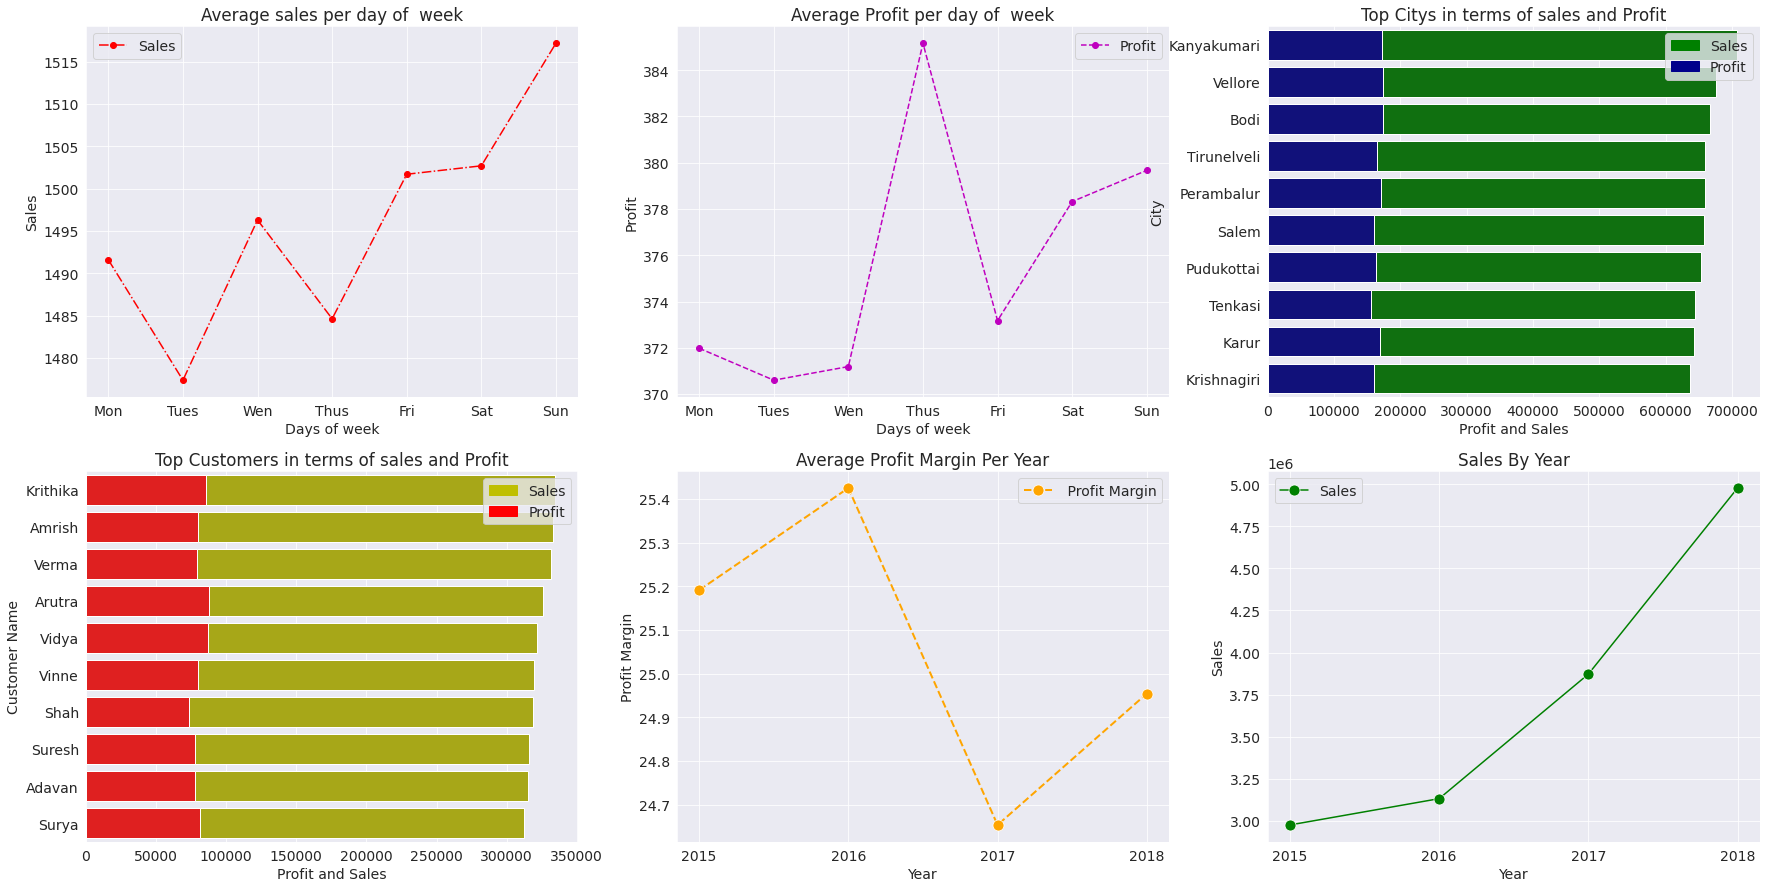

In [161]:
fig, axes = plt.subplots(2, 3, figsize=(30, 15))

axes[0,0].plot(Weekly_sales_av['Week Day'],Weekly_sales_av['Sales'],marker = 'o',color='r',ls='-.')
axes[0,0].set_title("Average sales per day of  week")
axes[0,0].set_ylabel("Sales")
axes[0,0].set_xlabel("Days of week")
axes[0,0].legend(['Sales'])

axes[0,1].plot(Weekly_sales_av['Week Day'],Weekly_sales_av['Profit'],marker = 'o',color='m',ls='--')
axes[0,1].set_title("Average Profit per day of  week")
axes[0,1].set_ylabel("Profit")
axes[0,1].set_xlabel("Days of week")
axes[0,1].legend(['Profit'])

axes[0,2].set_title("Top Citys in terms of sales and Profit")
sns.barplot(data=city_top,y=city_top.index,x='Sales',color = 'green',ax=axes[0,2])
sns.barplot(data=city_top,y=city_top.index,x='Profit',color = 'darkblue',ax=axes[0,2])
legend_label = ['Sales','Profit']
legend_color = ['green','darkblue']
legend_handel = [plt.Rectangle((0,0),1,1,color = c)for c in legend_color]
axes[0,2].legend(legend_handel,legend_label)
plt.xticks(city['Sales'])
axes[0,2].set_xlabel("Profit and Sales")

axes[1,0].set_title("Top Customers in terms of sales and Profit")
sns.barplot(data = df3,y=df3.index,x='Sales',color='y',ax=axes[1,0])
sns.barplot(data = df3,y=df3.index,x='Profit',color='r',ax=axes[1,0])
legend_label = ['Sales','Profit']
legend_color = ['y','r']
legend_handel = [plt.Rectangle((0,0),1,1,color = c)for c in legend_color]
axes[1,0].legend(legend_handel,legend_label)
axes[1,0].set_xlabel("Profit and Sales")



sns.lineplot(data=Yearly_Profit,x='Year',y='Profit Margin', marker='o',color = 'orange',linestyle='dashed',ms=11,lw=2,ax=axes[1,1])
plt.xticks(df.Year.unique())
axes[1,1].legend([' Profit Margin'])
axes[1,1].set_title("Average Profit Margin Per Year")
axes[1,1].set_xticks(Yearly_sales['Year'])



sns.lineplot(x=Yearly_sales['Year'],y=Yearly_sales['Sales'],ax = axes[1,2],marker = 'o',color = 'green',ms=11)
axes[1,2].set_title("Sales By Year")
axes[1,2].set_xticks(Yearly_sales['Year'])
axes[1,2].legend(['Sales'])

## •	Sundays are the busiest days for sales.

## •	Thursdays are the most profitable days.

## •	Kanyakumari has the highest sales volume of any metropolis.

## •	In terms of sales, Vellore is second only to Kanyakumari, but it is the most profitable metropolis.

##•	The annual profit margin is around 24-25%.

##•	Revenues have risen over time.

##•	Krithika earns the most money out of everyone.

##•	In terms of revenue, Amrish comes in second to Krithika.


In [137]:
import jovian

In [ ]:
jovian.commit()

# Asking and Answering Questions

## I will ask some quetion and adress them below.



# **Q1: Which Region Dominates sales and Generates the most Profit?**

In [139]:
Region_sales = df.groupby('Region')[['Sales','Profit']].sum()
Region_sales

,Sales,Profit
Region,,
Central,3468156,856806.84
East,4248368,1074345.58
North,1254,401.28
South,2440461,623562.89
West,4798743,1192004.61


In [140]:
df['Region'].value_counts()

West       3203
East       2848
Central    2323
South      1619
North         1
Name: Region, dtype: int64

In [141]:
df.drop((df[df['Region']=='North']).index,inplace=True)
Region_sales = df.groupby('Region')[['Sales','Profit']].sum()
Region_sales

,Sales,Profit
Region,,
Central,3468156,856806.84
East,4248368,1074345.58
South,2440461,623562.89
West,4798743,1192004.61


Text(0.5, 1.0, 'Sales and Profit Comparion By Region')

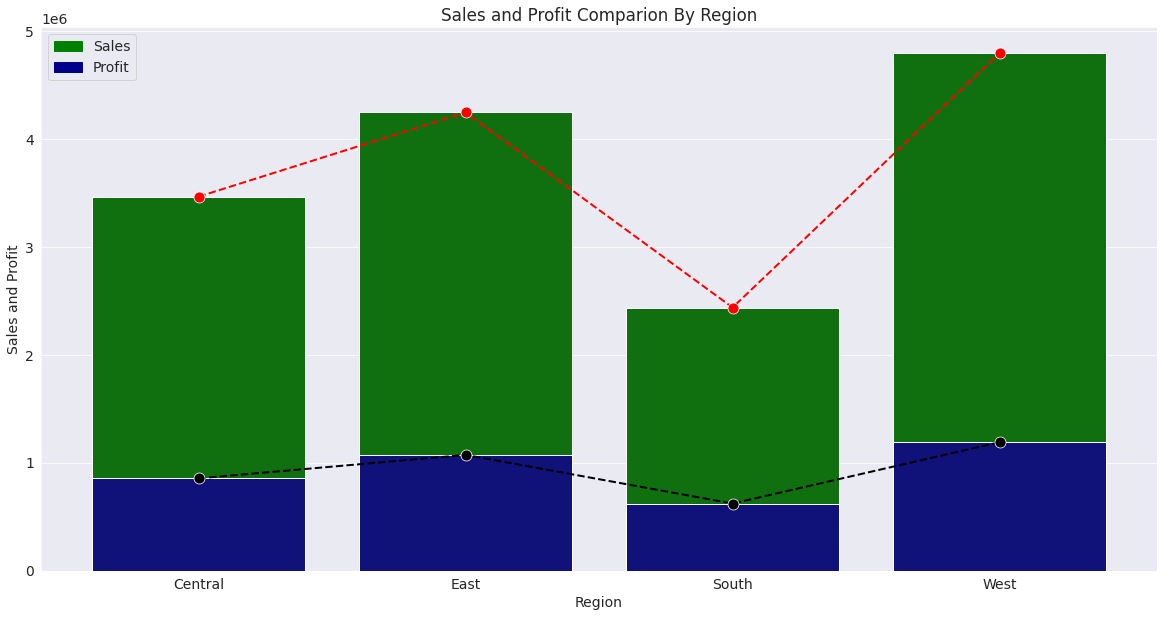

In [162]:
plt.figure(figsize=(20,10))
sns.barplot(x=Region_sales.index,y=Region_sales['Sales'],color = 'green')
sns.lineplot(x=Region_sales.index,y=Region_sales['Sales'],color = 'r',marker='o',linestyle='dashed',ms=11,lw=2)
sns.barplot(x=Region_sales.index,y=Region_sales['Profit'],color = 'darkblue')
sns.lineplot(x=Region_sales.index,y=Region_sales['Profit'],color = 'k',marker='o',linestyle='dashed',ms=11,lw=2)
plt.ylabel("Sales and Profit")
legend_label = ['Sales','Profit']
legend_colors = ['green','darkblue']
legend_handel = [plt.Rectangle((0,0),1,1, color = c) for c in legend_colors]
plt.legend(legend_handel,legend_label)
plt.title("Sales and Profit Comparion By Region")

# We grouped the region's sales and profit and discovered that the north region has the lowest sales and profit in comparison, so we checked the value count and discovered that the north region had only one sale, which appears to be an error, so we removed that one sale from the north region, and removing this will not affect our answer to the question. The West Area has the greatest sales and profit, followed by the East, and the South has the lowest sales and profit.

# **Q2: Is Sales growing month over month, and how much earnings is increasing?**

In [143]:
monthly_sales = df.groupby(['Month'])[['Sales','Profit']].sum()
monthly_sales= monthly_sales.reset_index()

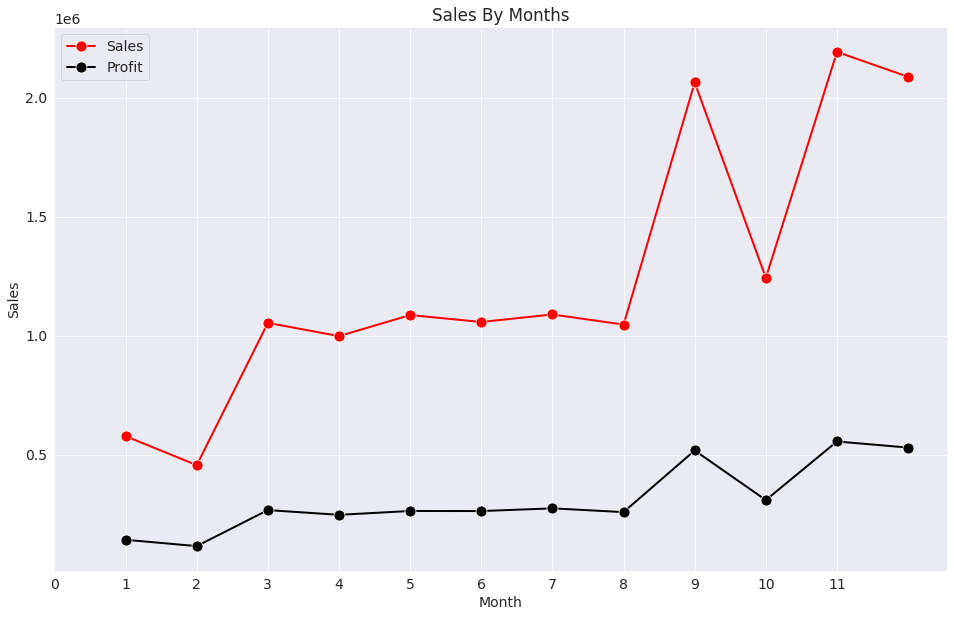

In [190]:
plt.figure(figsize=(16,10))
sns.lineplot(x=monthly_sales['Month'],y=monthly_sales['Sales'],marker = 'o',color = 'r',linewidth = 2,ms=11,label='Sales')
sns.lineplot(x=monthly_sales['Month'],y=monthly_sales['Profit'],marker = 'o',color = 'k',linewidth = 2,ms=11,label='Profit')
plt.xticks((monthly_sales.index))
plt.title("Sales By Months")
plt.legend()

# Sales are increasing month after month, with a small spike from the second to the third month, then steady ups and downs, but a substantial increase from the eighth to the ninth month, and another increase in the tenth month, but there is no notable increase in profit with respect to sales.

# **Q3: Does Discount has an impacked on sales?Does increase in discount increases sales?**


In [145]:
f=df.groupby('Discount')[['Sales']].mean()

Text(0.5, 1.0, 'Sales with respect to Discount')

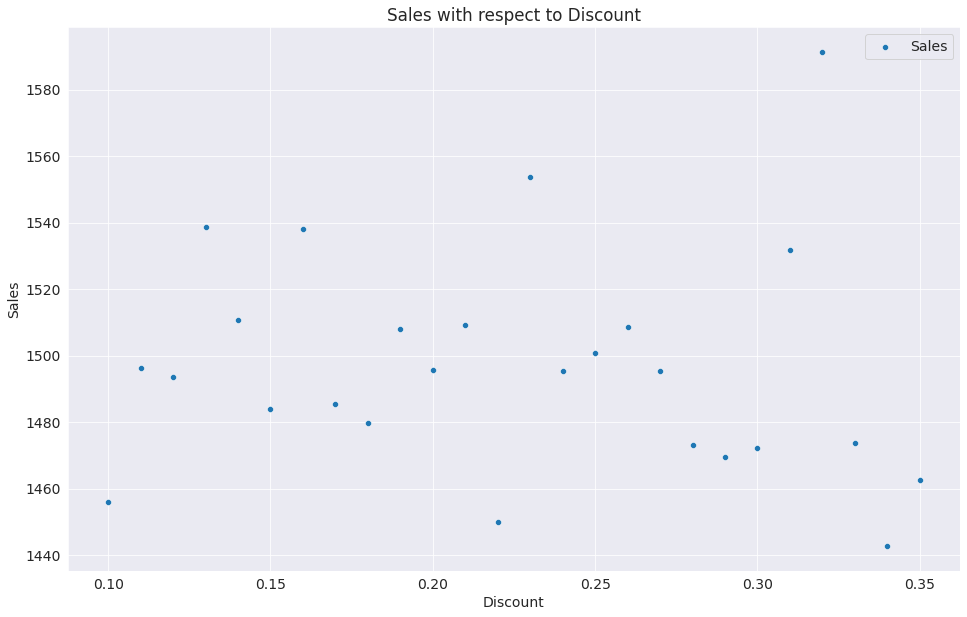

In [191]:
plt.figure(figsize =(16,10))
sns.scatterplot(x=f.index,y=f['Sales'])
plt.legend(['Sales'])
plt.title("Sales with respect to Discount")

In [148]:
import scipy.stats as stats
corr, p = stats.pearsonr(df['Discount'], df['Sales'])
#H0: Sales is not affected by Discount
#H1: Sales is affected by Discount
if p < 0.05:
    print("Sales are affected by Discount which mean changes in discount percentage can affect sales.")
else:
    print("Sales are not affected by Discount which mean changes in discount percentage does affect sales.")

Sales are not affected by Discount which mean changes in discount percentage does affect sales.


# We grouped Discount with average sales and plotted a scatter plot and show didn't saw any relationship between sales and discount.The null hypothesis (H0) states that there is no meaningful relationship between the discount and the resulting sales revenue. In other words, the null hypothesis implies that the discount has no effect on sales. The alternative hypothesis (Ha or H1) is that there is a substantial relationship between the discount and the resulting sales revenue. In other words, the alternative hypothesis implies that the discount has an effect on sales.A correlation test, such as the Pearson correlation test, could be used to evaluate this hypothesis. The correlation coefficient (r) represents the strength and direction of the relationship between the two variables (discount and sales), whereas the p-value represents the likelihood of observing the data if the null hypothesis is correct (i.e., if there is no relationship between discount and sales). If the p-value is less than the significance threshold (e.g., 0.05), the null hypothesis is rejected and a significant relationship between discount and sales is concluded. If the p-value is higher than the significance level, the null hypothesis is not rejected, and you conclude that there is no significant relationship between discount and sales.

# **Q4: Which year made the most money?**

In [149]:
Yearly_sales

,Year,Sales,Profit
0,2015,2975599,752529.11
1,2016,3131959,797192.99
2,2017,3871912,953216.22
3,2018,4977512,1244182.88


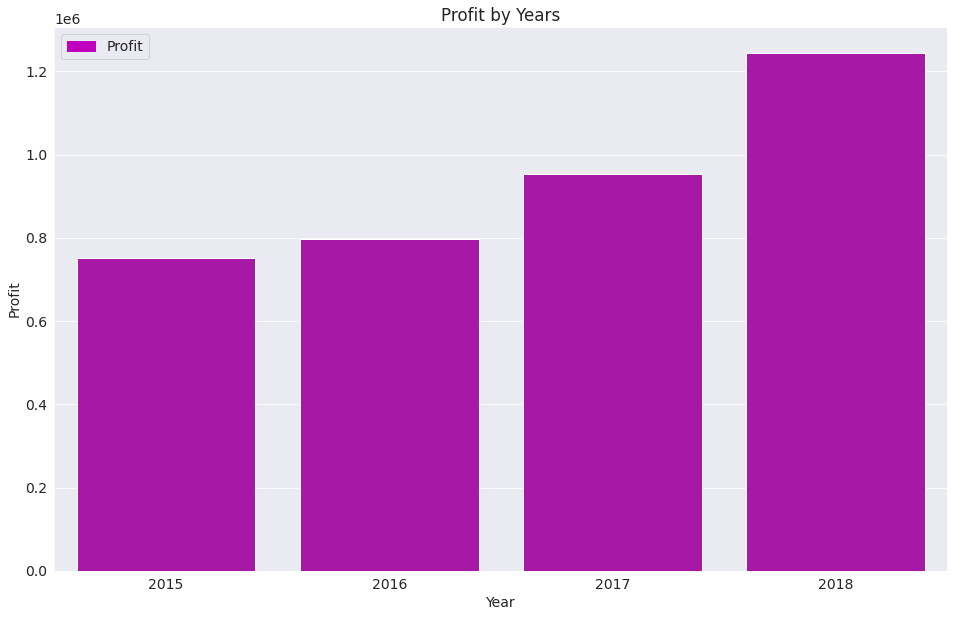

In [193]:
plt.figure(figsize=(16,10))
sns.barplot(data =Yearly_sales,x='Year',y='Profit',color= 'm' )
plt.title("Profit by Years")
legend_label = ['Profit']
legend_color = ['m']
legend_handel = [plt.Rectangle((0,0),1,1,color = c)for c in legend_color]
plt.legend(legend_handel,legend_label)

# As previously stated, revenue increased year after year, and profit increased year after year, with 2018 being the most profitable.

# **Q5: Who are the most devoted customers?**

In [151]:
loyal=  pd.pivot_table(data =df,index = 'Customer Name',columns='Year' ,values = 'Order ID',aggfunc= 'count')

In [152]:
loyal[(loyal[2015]>44) & (loyal[2016]>44) & (loyal[2017]>44) & (loyal[2018]>44)]

Year,2015,2016,2017,2018
Customer Name,,,,
Amrish,51,52,59,65
Arutra,48,47,60,63
Sudeep,48,45,53,61


# Amrish, Arutra, and Sudeep are the most devoted customers, having made more than 44 purchases each year.

# **Q6: Which category makes the most money?**

Text(0.5, 1.0, ' Which category makes the most money? ')

<Figure size 1152x720 with 0 Axes>

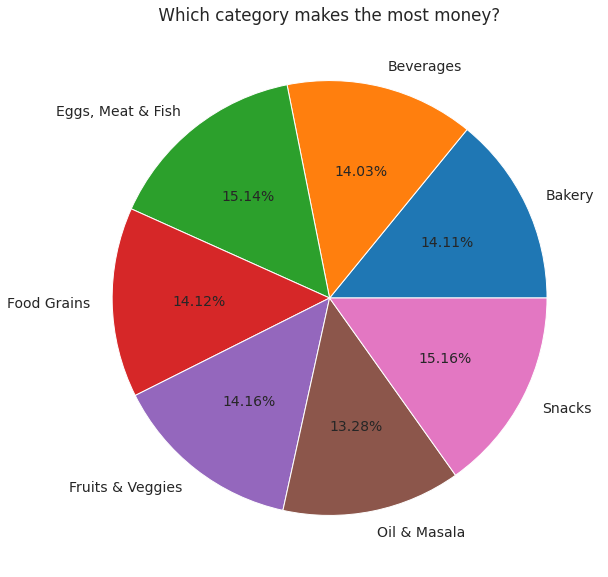

In [153]:
plt.figure(figsize=(16,10))
category_profit =df.groupby('Category')[['Profit','Sales']].sum()
plt.figure(figsize=(16,10))
plt.pie(category_profit['Profit'],labels=category_profit.index, autopct='%.2f%%')
plt.title(" Which category makes the most money? ")

# The most money is made in the category of Snacks which is 15.16%.

In [154]:
import jovian

In [ ]:
jovian.commit()

# Inferences and Conclusion


##•	Sundays are the busiest days for shopping.
##•	Kanyakumari has the most users and the greatest revenue of any area.
##•	In terms of sales, the western region is pretty prominent.
##•	Discounts do not impact sales.
##•	Snacks is the most profitable area, with a profit share of 15.16%.
##•	Profit margins are modest, hovering around 24-25%.
##•	Profits have been growing over the years.





##Conclusion: Based on the data presented, it appears that Sundays and Kanyakumari are the most significant factors in generating sales, with the Western area dominating in terms of sales. It's also worth noting that discounts have no effect on sales and that the Snacks category is the most lucrative. Furthermore, while profit margins are modest, earnings have increased over time. This data can help businesses optimize their sales and marketing strategies, as well as product managers who want to concentrate on the most profitable product categories.



In [156]:
import jovian

In [ ]:
jovian.commit()

# References and Future Work

## We now know that sales are affected by a variety of factors such as area, city, day of week, and many others. We also discovered that sales are not affected by discounts, so we can now train an ML model to forecast sales using insights from this.

In [158]:
import jovian

In [ ]:
jovian.commit()